In [1]:
import pdftotext
import nltk
from nltk.corpus import stopwords
import pandas as pd
from pathlib import Path

In [2]:
# text tokenization
#nltk.download('punkt')

# stopwords
#nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ryanrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

***
***
## Process a directory of PDF

In [3]:
# adjust directory to point to location of files
directory = 'test_pdf/'

# create file list of pdf in directory
pdf_folder = Path(directory).rglob('*.pdf')

# create list of files and verify contents
# should be 5 if using supplied 'test_pdf' directory
files = [file for file in pdf_folder]
files

[PosixPath('test_pdf/MedvedevaEtAl2019.pdf'),
 PosixPath('test_pdf/KDD97-003.pdf'),
 PosixPath('test_pdf/P99-1001.pdf'),
 PosixPath('test_pdf/10.1007978-3-319-67056-018.pdf'),
 PosixPath('test_pdf/dummy_test.pdf')]

## Iterate through each file and
* Tokenize file text
* Create consistent case `.lower()` for each token
* Remove tokens from `nltk` library `english` stopwords
* Remove non-`.isalpha()` tokens

In [4]:
tokens = []
stopWords = set(stopwords.words('english'))

# iterate every file in directory
for file in files:
    # open file
    with open(file, 'rb') as f:
        # conversion with pdftotext
        multi_pdf = pdftotext.PDF(f)
        # place current pdf text into list of tokens
        tokens += nltk.word_tokenize(''.join(multi_pdf))

# update tokens by setting all to lowercase,
# removing stopwords,
# removing non-alphanumeric
tokens_removed = [word.lower() for word in tokens
                  if word.lower() not in stopWords
                  and word.isalpha()]

## verify removal of stopwords by displaying initial `token` lenght, `tokens_removed` length and difference of values

In [5]:
len(tokens), len(tokens_removed), len(tokens)-len(tokens_removed)

(45703, 20387, 25316)

***
***
## user directed word search
* alter `words` list to include desired search terms as list of type string

In [ ]:
# initialize user summary list
words = [""]
word_summary = []
# create list with sublist [word, count]
for word in range(len(words)):
    word_summary.append([words[word], nltk.Text(tokens).count(words[word])])

## user specifies 5 words
* utilizes `pandas` library to create dataframe of `word` and `count` as well as simple bar graph

In [ ]:
df_multi = pd.DataFrame(word_summary, columns = ["word", "count"])
df_multi

In [ ]:
df_multi.plot.bar(x='word', y='count')

***
***

## NLTK provides top 5
* This allows the data to drive further work by looking solely at the top N words in the files processed.
* By default the tokens are cleaned by removing `tokens` in the `nltk` library `stopwords` English list, as well as punctuation and non-alphanumeric `tokens` from the `string` methods.
* `nltk` directed search allows the opportunity for supervised follow-up utilizing inference from `tokens` provided and additional user input to narrow in on "hits" in the dataset.
* Since `most_common()` method provides all entries it can be indexed as a traditional list to look anywhere in the list if desired.
 * Alternately `most_common(n)` can be used where `n` is the number of words to search for if concerned about slowdown via processing too many tokens.

### create a frequencity distribution based off of the cleaned tokens

In [6]:
fd = nltk.FreqDist(tokens_removed)

### `most_common(n)` provides a list of `n` length with sublist `[word, count]`
### create a dataframe utilizing the 5 most common words in the cleaned token list

In [113]:
n = 10

In [114]:
data = fd.most_common()
df_fd = pd.DataFrame(data[:n], columns = ["word", "count"])
df_fd

,word,count
0,text,255
1,data,238
2,mining,195
3,information,153
4,cases,150
5,articles,124
6,learning,111
7,results,111
8,case,110
9,used,108


### create a simple bar graph of top `n` words vs count

<AxesSubplot:xlabel='word'>

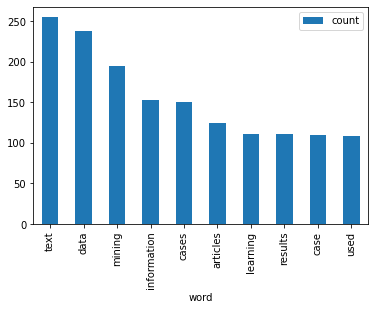

In [115]:
df_fd.plot.bar(x='word', y='count')

***
***
# TO-DO
### immediate
* clustering method
 * tf-idf on each PDF then cull to look at score for top `n` words?

### long-term
* Look into API for digital commons
* Adjust visualizations
***
***

### THIS TAKES A LONG TIME!
### IT IS ALL THE TOKENS!
### (not a good idea)

In [91]:
#nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens_removed)

In [92]:
tagged

[('page', 'NN'),
 ('containing', 'VBG'),
 ('authors', 'NNS'),
 ('details', 'NNS'),
 ('noname', 'JJ'),
 ('manuscript', 'RB'),
 ('inserted', 'VBN'),
 ('editor', 'NN'),
 ('using', 'VBG'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('predict', 'JJ'),
 ('decisions', 'NNS'),
 ('european', 'JJ'),
 ('court', 'NN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('masha', 'NN'),
 ('medvedeva', 'NN'),
 ('michel', 'NN'),
 ('vols', 'NNS'),
 ('martijn', 'VBP'),
 ('wieling', 'VBG'),
 ('abstract', 'NN'),
 ('courts', 'NNS'),
 ('started', 'VBD'),
 ('publishing', 'VBG'),
 ('judgements', 'NNS'),
 ('big', 'JJ'),
 ('data', 'NNS'),
 ('analysis', 'NN'),
 ('scale', 'NN'),
 ('statistical', 'JJ'),
 ('analysis', 'NN'),
 ('case', 'NN'),
 ('law', 'NN'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('within', 'IN'),
 ('legal', 'JJ'),
 ('domain', 'NN'),
 ('became', 'VBD'),
 ('possible', 'JJ'),
 ('taking', 'VBG'),
 ('data', 'NNS'),
 ('european', 'JJ'),
 ('court', 'NN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('ample', 'NN'),
 

In [ ]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities

***
### Look instead at `tagged` and `entities` from the top N words only

In [116]:
#n = 10
target_index = sorted(list(fd.values()), reverse = True)[0:n]

In [117]:
target_words = [ list(fd.keys())[list(fd.values()).index(x)] for x in target_index ]

In [118]:
target_words

['text',
 'data',
 'mining',
 'information',
 'cases',
 'articles',
 'learning',
 'learning',
 'case',
 'used']

In [119]:
tagged = nltk.pos_tag(target_words)
tagged

[('text', 'NN'),
 ('data', 'NNS'),
 ('mining', 'NN'),
 ('information', 'NN'),
 ('cases', 'NNS'),
 ('articles', 'VBZ'),
 ('learning', 'VBG'),
 ('learning', 'VBG'),
 ('case', 'NN'),
 ('used', 'VBN')]

## `pos_tag` codes: https://www.guru99.com/pos-tagging-chunking-nltk.html

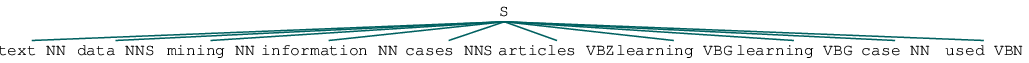

In [120]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [121]:
type(tagged), tagged, type(entities), entities

(list,
 [('text', 'NN'),
  ('data', 'NNS'),
  ('mining', 'NN'),
  ('information', 'NN'),
  ('cases', 'NNS'),
  ('articles', 'VBZ'),
  ('learning', 'VBG'),
  ('learning', 'VBG'),
  ('case', 'NN'),
  ('used', 'VBN')],
 nltk.tree.Tree,
 Tree('S', [('text', 'NN'), ('data', 'NNS'), ('mining', 'NN'), ('information', 'NN'), ('cases', 'NNS'), ('articles', 'VBZ'), ('learning', 'VBG'), ('learning', 'VBG'), ('case', 'NN'), ('used', 'VBN')]))